In [60]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from scipy.interpolate import spline
from matplotlib.ticker import LinearLocator, FormatStrFormatter

path = 'exp_results/'
RWD = 'rewards.npy'
NONE_RST = 'test_none_reset/'
NONE_RST_LONG = 'test_none_reset_long/'
LIST_RST = 'test_only_listener_reset/'
SPKE_RST = 'test_only_speaker_reset/'
BOTH_RST = 'test_both_spk_and_lis/'
BOTH_RST_LONG = 'test_both_spk_and_lis_long/'

C5.1 Convergence Behavior -- Rewards
----------

In [41]:
RWD_none = np.load(path+NONE_RST+RWD)/64
RWD_list = np.load(path+LIST_RST+RWD)/64
RWD_spke = np.load(path+SPKE_RST+RWD)/64
RWD_both = np.load(path+BOTH_RST+RWD)/64

In [42]:
def smooth_rwd(rwd,ratio=10):
    new_rwd = np.zeros(rwd.shape)
    tmp = rwd[0]
    for i in range(rwd.size):
        tmp = (1-1/ratio)*tmp + 1/ratio*rwd[i]
        new_rwd[i] = tmp
    return new_rwd

/usr/lib64/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


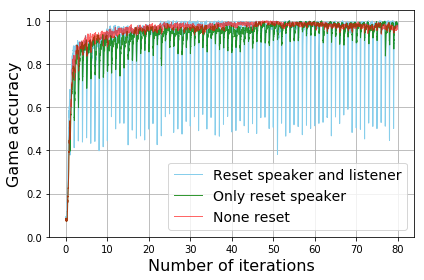

In [43]:
fig_rwd1 = plt.figure(figsize=(6,4))
ax = fig_rwd1.add_subplot(1,1,1)

x = np.arange(0,8000,1)*0.01
ax.plot(x, smooth_rwd(RWD_both[::20],5),linewidth=1,alpha=1,label='Reset speaker and listener',color='skyblue')
#ax.plot(smooth_rwd(RWD_list[::10],10),linewidth=1,alpha=0.5,label='Only reset listener')
ax.plot(x, smooth_rwd(RWD_spke[::20],5),linewidth=1,alpha=0.8,label='Only reset speaker',color='green')
ax.plot(x, smooth_rwd(RWD_none[::20],5),linewidth=1,alpha=0.6,label='None reset',color='red')

plt.xlabel('Number of iterations',fontsize=16)
plt.ylabel('Game accuracy',fontsize=16)

plt.ylim(0,1.05)
ax.legend(fontsize=14)
ax.grid('on')
fig_rwd1.tight_layout()
fig_rwd1.savefig('Figures/Reward_compare.pdf')


/usr/lib64/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


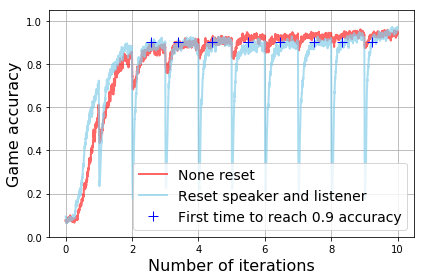

In [44]:
fig_rwd2 = plt.figure(figsize=(6,4))
ax = fig_rwd2.add_subplot(1,1,1)

x = np.arange(0,10000,1)*0.001

y_both = smooth_rwd(RWD_both[:20000:2],10)
y_none = smooth_rwd(RWD_none[:20000:2],10)

flag = 0
first_reach_list = []
for i in range(y_both.shape[0]):
    if y_both[i]>0.9 and flag==0:
        flag = 1
        first_reach_list.append(i)
    if y_both[i]<0.5:
        flag = 0
        

x_fr = x[first_reach_list]
y_fr = np.ones(x_fr.shape)*0.9
#ax.plot(x_fr,y_fr,'b.',mak=5,label='First time to reach 0.85 accuracy')
ax.plot(x, y_none,linewidth=2,alpha=0.6,label='None reset',color='red')
ax.plot(x, y_both,linewidth=2,alpha=0.7,label='Reset speaker and listener', color='skyblue')
#ax.scatter(x_fr,y_fr,linewidth=2,label='First time to reach 0.9 accuracy')
ax.plot(x_fr,y_fr,'b+',markersize=10,label='First time to reach 0.9 accuracy')

plt.xlabel('Number of iterations',fontsize=16)
plt.ylabel('Game accuracy',fontsize=16)

plt.ylim(0,1.05)
ax.legend(fontsize=14)
ax.grid('on')

fig_rwd2.tight_layout()
fig_rwd2.savefig('Figures/Reward_compare_fine.pdf')

In [45]:
first_reach_list

[2566, 3385, 4417, 5489, 6457, 7497, 8313, 9219]

C5.1 Convergence Behavior -- Topological Similarity Dynamics
----------

In [61]:
RWD = 'comp_ps.npy'
SMOOTH_RATIO = 1
RHO_none = np.load(path+NONE_RST+RWD)
RHO_list = np.load(path+LIST_RST+RWD)
RHO_spke = np.load(path+SPKE_RST+RWD)
RHO_both = np.load(path+BOTH_RST_LONG+RWD)[:80*100]

RHO_none_matrix = RHO_none.reshape((80,100))
RHO_list_matrix = RHO_list.reshape((80,100))
RHO_spke_matrix = RHO_spke.reshape((80,100))
RHO_both_matrix = RHO_both.reshape((80,100))

RHO_none_avg = smooth_rwd(np.average(RHO_none_matrix,axis=1),SMOOTH_RATIO)
RHO_list_avg = smooth_rwd(np.average(RHO_list_matrix,axis=1),SMOOTH_RATIO)
RHO_spke_avg = smooth_rwd(np.average(RHO_spke_matrix,axis=1),SMOOTH_RATIO)
RHO_both_avg = smooth_rwd(np.average(RHO_both_matrix,axis=1),SMOOTH_RATIO)

RHO_none_std = smooth_rwd(RHO_none_matrix.std(1), 2*SMOOTH_RATIO)
RHO_list_std = smooth_rwd(RHO_list_matrix.std(1), 2*SMOOTH_RATIO)
RHO_spke_std = smooth_rwd(RHO_spke_matrix.std(1), 2*SMOOTH_RATIO)
RHO_both_std = smooth_rwd(RHO_both_matrix.std(1), 2*SMOOTH_RATIO)


/usr/lib64/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


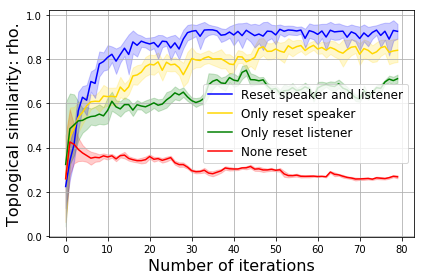

In [62]:
fig_comp = plt.figure(figsize=(6,4))
ax = fig_comp.add_subplot(1,1,1)

x = np.arange(0,RHO_none_std.shape[0])
ax.plot(x, RHO_both_avg, color='blue',label='Reset speaker and listener')
ax.plot(x, RHO_spke_avg, color='gold',label='Only reset speaker')
ax.plot(x, RHO_list_avg, color='green',label='Only reset listener')
ax.plot(x, RHO_none_avg, color='red',label='None reset')

ax.fill_between(x, RHO_none_avg - 2*RHO_none_std, RHO_none_avg+2*RHO_none_std, color='red', alpha=0.2)
ax.fill_between(x, RHO_list_avg - 2*RHO_list_std, RHO_list_avg+2*RHO_list_std, color='green', alpha=0.2)
ax.fill_between(x, RHO_spke_avg - 2*RHO_spke_std, RHO_spke_avg+2*RHO_spke_std, color='gold', alpha=0.2)
ax.fill_between(x, RHO_both_avg - 2*RHO_both_std, RHO_both_avg+2*RHO_both_std, color='blue', alpha=0.2)

plt.xlabel('Number of iterations',fontsize=16)
plt.ylabel('Toplogical similarity: rho.',fontsize=16)

#plt.ylim(0,0.92)
ax.legend(fontsize=12)
ax.grid('on')

fig_comp.tight_layout()
fig_comp.savefig('Figures/Toplogical_sim_compare.pdf')

C5.1 Distribution of P(La|D) -- Both_reset
----------

In [148]:
def smooth(matrix, ratio=20):
    '''
        Smooth the matrix according colums
    '''
    new_matrix = np.zeros(matrix.shape)
    for i in range(matrix.shape[1]):
        tmp = 0
        for j in range(matrix.shape[0]):
            tmp = (1-1/ratio)*tmp + 1/ratio*matrix[j,i]
            new_matrix[j,i] = tmp
    return new_matrix

In [149]:
BINS = 10
PDF = 'comp_generations.npy'
PDF_both_spk_and_lis = np.load(path+BOTH_RST+PDF)[:80,:]

In [150]:
PDF_both_spk_and_lis.shape

(80, 100)

In [151]:
histo_list = []
for comp_list in PDF_both_spk_and_lis:
    tmp_histo = np.histogram(comp_list, bins=BINS)[0]
    histo_list.append(tmp_histo)
    
histo_matrix = np.asarray(histo_list)
histo_matrix = smooth(histo_matrix,5) # Smooth across generations

X = np.arange(0,BINS,1)*0.1
X_NEW = np.linspace(min(X),max(X),40)

smoth_matrix=[]
for gen in range(histo_matrix.shape[0]):   # Smooth for each generation
    tmp_line = histo_matrix[gen,:]
    smoth_line = spline(X,tmp_line,X_NEW)
    smoth_line = smoth_line/smoth_line.sum()
    smoth_matrix.append(smoth_line)

smoth_matrix = np.asarray(smoth_matrix)

/usr/lib/python3.6/site-packages/ipykernel_launcher.py:15: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.
  from ipykernel import kernelapp as app


In [152]:
smoth_matrix.shape

(80, 40)

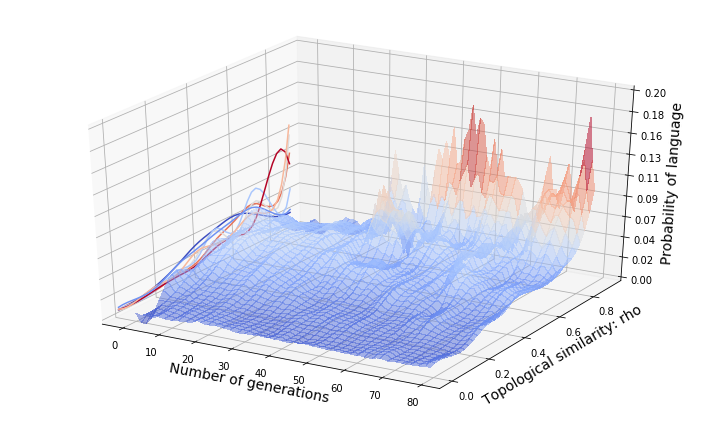

In [153]:
fig = plt.figure(figsize=(10,6))
ax = fig.gca(projection='3d')

Y = np.arange(0,80,1)
X_G, Y_G = np.meshgrid(X_NEW, Y)
Z = smoth_matrix
surf = ax.plot_surface(Y_G,X_G,Z,cmap=cm.coolwarm,linewidth=1,antialiased=False, alpha=0.5)
#cset = ax.contour(Y_G,X_G,Z,zdir='z',offset = 0, cmap=cm.coolwarm)
cset = ax.contour(Y_G,X_G,Z,zdir='x',offset = -5, cmap=cm.coolwarm)
ax.set_zlim(0,0.2)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

ax.set_xlabel('Number of generations',fontsize=14)
ax.set_ylabel('Topological similarity: rho',fontsize=14)
ax.set_zlabel('Probability of language',fontsize=14)

#fig.colorbar(surf,shrink=0.5,aspect=5)
#ax.view_init(elev=90,azim=270)

fig.tight_layout()
fig.savefig('Figures/Both_reset_3D.pdf')

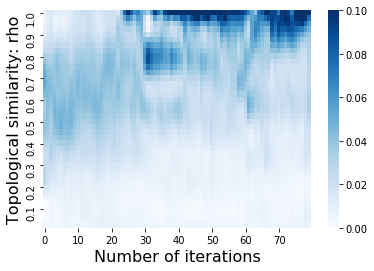

In [138]:
f, ax = plt.subplots(figsize=(6,4))

import pandas as pd
smoth_matrix_df = pd.DataFrame(smoth_matrix[:,::-1],columns=list(np.arange(40,0,-1)/40))
sns.heatmap(smoth_matrix_df.transpose(),fmt='f',ax=ax, vmin=0, vmax=0.1,cmap=cm.Blues,xticklabels=10,yticklabels=4)
plt.xlabel('Number of iterations', fontsize=16)
plt.ylabel('Topological similarity: rho', fontsize=16)
f.savefig('Figures/Both_reset_heatmap.pdf',bbox_inches='tight')

/usr/lib64/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


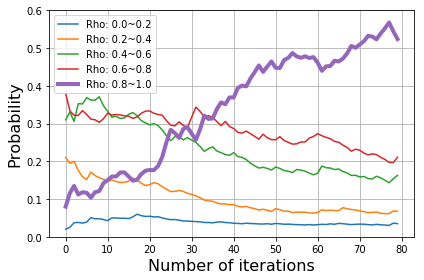

In [139]:
fig2 = plt.figure(figsize=(6,4))
ax2 = fig2.add_subplot(1,1,1)

BINS_2 = 5
histo_list2 = []
for comp_list in PDF_both_spk_and_lis:
    tmp_histo2 = np.histogram(comp_list, bins=BINS_2)[0]
    histo_list2.append(tmp_histo2)

histo_matrix2 = np.asarray(histo_list2)
smoth_matrix2 = smooth(histo_matrix2,20)

for i in range(smoth_matrix2.shape[0]):
    tmp_line = smoth_matrix2[i,:]
    tmp_line = tmp_line/tmp_line.sum()
    smoth_matrix2[i,:] = tmp_line

ax2.plot(smoth_matrix2[:,0],label='Rho: 0.0~0.2')
ax2.plot(smoth_matrix2[:,1],label='Rho: 0.2~0.4')
ax2.plot(smoth_matrix2[:,2],label='Rho: 0.4~0.6')
ax2.plot(smoth_matrix2[:,3],label='Rho: 0.6~0.8')
ax2.plot(smoth_matrix2[:,4],label='Rho: 0.8~1.0',linewidth=4)

plt.ylim(0,0.6)
plt.xlabel('Number of iterations',fontsize=16)
plt.ylabel('Probability',fontsize=16)

ax2.legend()
ax2.grid('on')
fig2.tight_layout()
fig2.savefig('Figures/Both_reset_bins_distribution.pdf')


C5.1 Distribution of P(La|D) -- None_reset
----------

In [141]:
PDF_none_spk_and_lis = np.load(path+NONE_RST_LONG+PDF)[:80,:]

In [142]:
histo_list = []
for comp_list in PDF_none_spk_and_lis:
    tmp_histo = np.histogram(comp_list, bins=BINS)[0]
    histo_list.append(tmp_histo)
    
histo_matrix = np.asarray(histo_list)
histo_matrix = smooth(histo_matrix,10) # Smooth across generations

X = np.arange(0,BINS,1)*0.1
X_NEW = np.linspace(min(X),max(X),40)

smoth_matrix=[]
for gen in range(histo_matrix.shape[0]):   # Smooth for each generation
    tmp_line = histo_matrix[gen,:]
    smoth_line = spline(X,tmp_line,X_NEW)
    smoth_line = smoth_line/smoth_line.sum()
    smoth_matrix.append(smoth_line)

smoth_matrix = np.asarray(smoth_matrix)

/usr/lib/python3.6/site-packages/ipykernel_launcher.py:15: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.
  from ipykernel import kernelapp as app


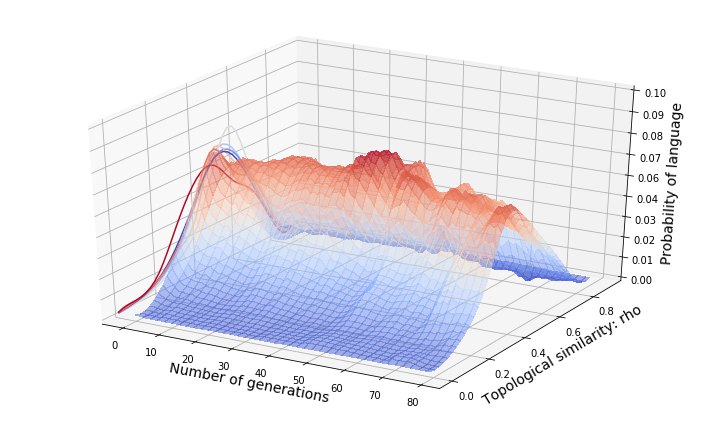

In [144]:
fig = plt.figure(figsize=(10,6))
ax = fig.gca(projection='3d')

Y = np.arange(0,80,1)
X_G, Y_G = np.meshgrid(X_NEW, Y)
Z = smoth_matrix
surf = ax.plot_surface(Y_G,X_G,Z,cmap=cm.coolwarm,linewidth=1,antialiased=False, alpha=0.5)
#cset = ax.contour(Y_G,X_G,Z,zdir='z',offset = 0, cmap=cm.coolwarm)
cset = ax.contour(Y_G,X_G,Z,zdir='x',offset = -5, cmap=cm.coolwarm)
ax.set_zlim(0,0.1)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

ax.set_xlabel('Number of generations',fontsize=14)
ax.set_ylabel('Topological similarity: rho',fontsize=14)
ax.set_zlabel('Probability of language',fontsize=14)

#fig.colorbar(surf,shrink=0.5,aspect=5)
#ax.view_init(elev=90,azim=270)

fig.tight_layout()
fig.savefig('Figures/None_reset_3D.pdf')

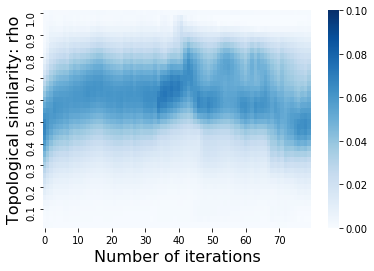

In [145]:
f, ax = plt.subplots(figsize=(6,4))

import pandas as pd
smoth_matrix_df = pd.DataFrame(smoth_matrix[:,::-1],columns=list(np.arange(40,0,-1)/40))
sns.heatmap(smoth_matrix_df.transpose(),fmt='f',ax=ax, vmin=0, vmax=0.1,cmap=cm.Blues,xticklabels=10,yticklabels=4)
plt.xlabel('Number of iterations', fontsize=16)
plt.ylabel('Topological similarity: rho', fontsize=16)
f.savefig('Figures/None_reset_heatmap.pdf',bbox_inches='tight')

/usr/lib64/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


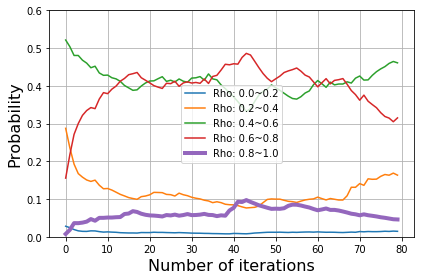

In [146]:
fig2 = plt.figure(figsize=(6,4))
ax2 = fig2.add_subplot(1,1,1)

BINS_2 = 5
histo_list2 = []
for comp_list in PDF_none_spk_and_lis:
    tmp_histo2 = np.histogram(comp_list, bins=BINS_2)[0]
    histo_list2.append(tmp_histo2)

histo_matrix2 = np.asarray(histo_list2)
smoth_matrix2 = smooth(histo_matrix2,20)

for i in range(smoth_matrix2.shape[0]):
    tmp_line = smoth_matrix2[i,:]
    tmp_line = tmp_line/tmp_line.sum()
    smoth_matrix2[i,:] = tmp_line

ax2.plot(smoth_matrix2[:,0],label='Rho: 0.0~0.2')
ax2.plot(smoth_matrix2[:,1],label='Rho: 0.2~0.4')
ax2.plot(smoth_matrix2[:,2],label='Rho: 0.4~0.6')
ax2.plot(smoth_matrix2[:,3],label='Rho: 0.6~0.8')
ax2.plot(smoth_matrix2[:,4],label='Rho: 0.8~1.0',linewidth=4)

plt.ylim(0,0.6)
plt.xlabel('Number of iterations',fontsize=16)
plt.ylabel('Probability',fontsize=16)

ax2.legend()
ax2.grid('on')
fig2.tight_layout()
fig2.savefig('Figures/None_reset_bins_distribution.pdf')
